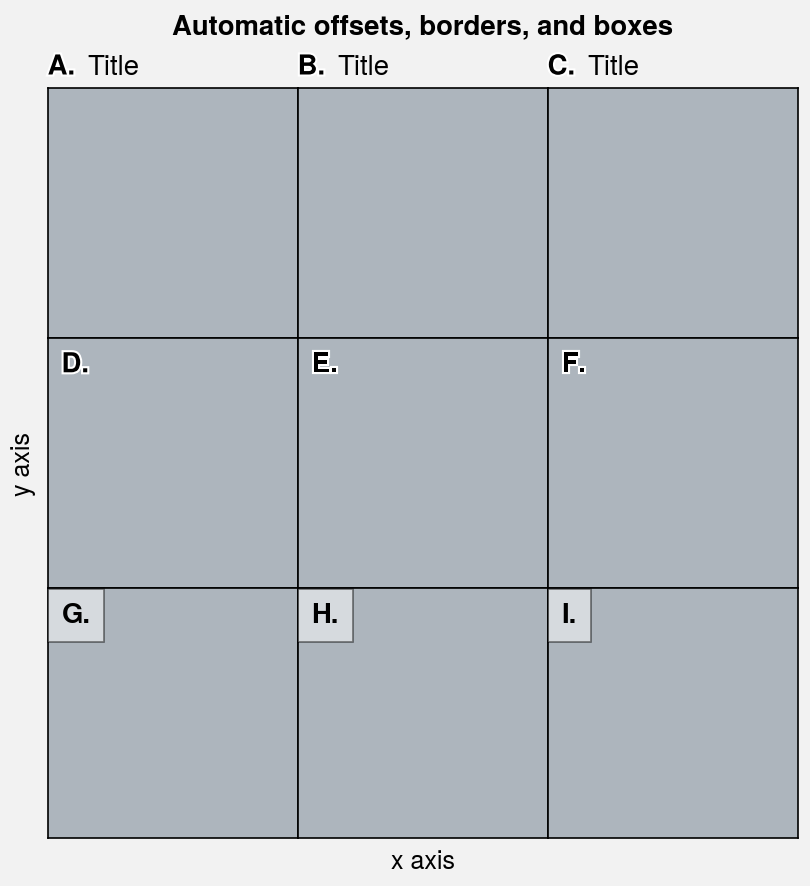

In [1]:
import proplot as pplt
fig, axs = pplt.subplots(ncols=3, nrows=3, space=0, refwidth='10em')
axs.format(
    abc=True, abcloc='ul', abcstyle='A.',
    xticks='null', yticks='null', facecolor='gray5',
    xlabel='x axis', ylabel='y axis',
    suptitle='Automatic offsets, borders, and boxes',
)
axs[:3].format(abcloc='l', titleloc='l', title='Title')
axs[-3:].format(abcbbox=True)  # also disables abcborder
# axs[:-3].format(abcborder=True)  # this is already the default

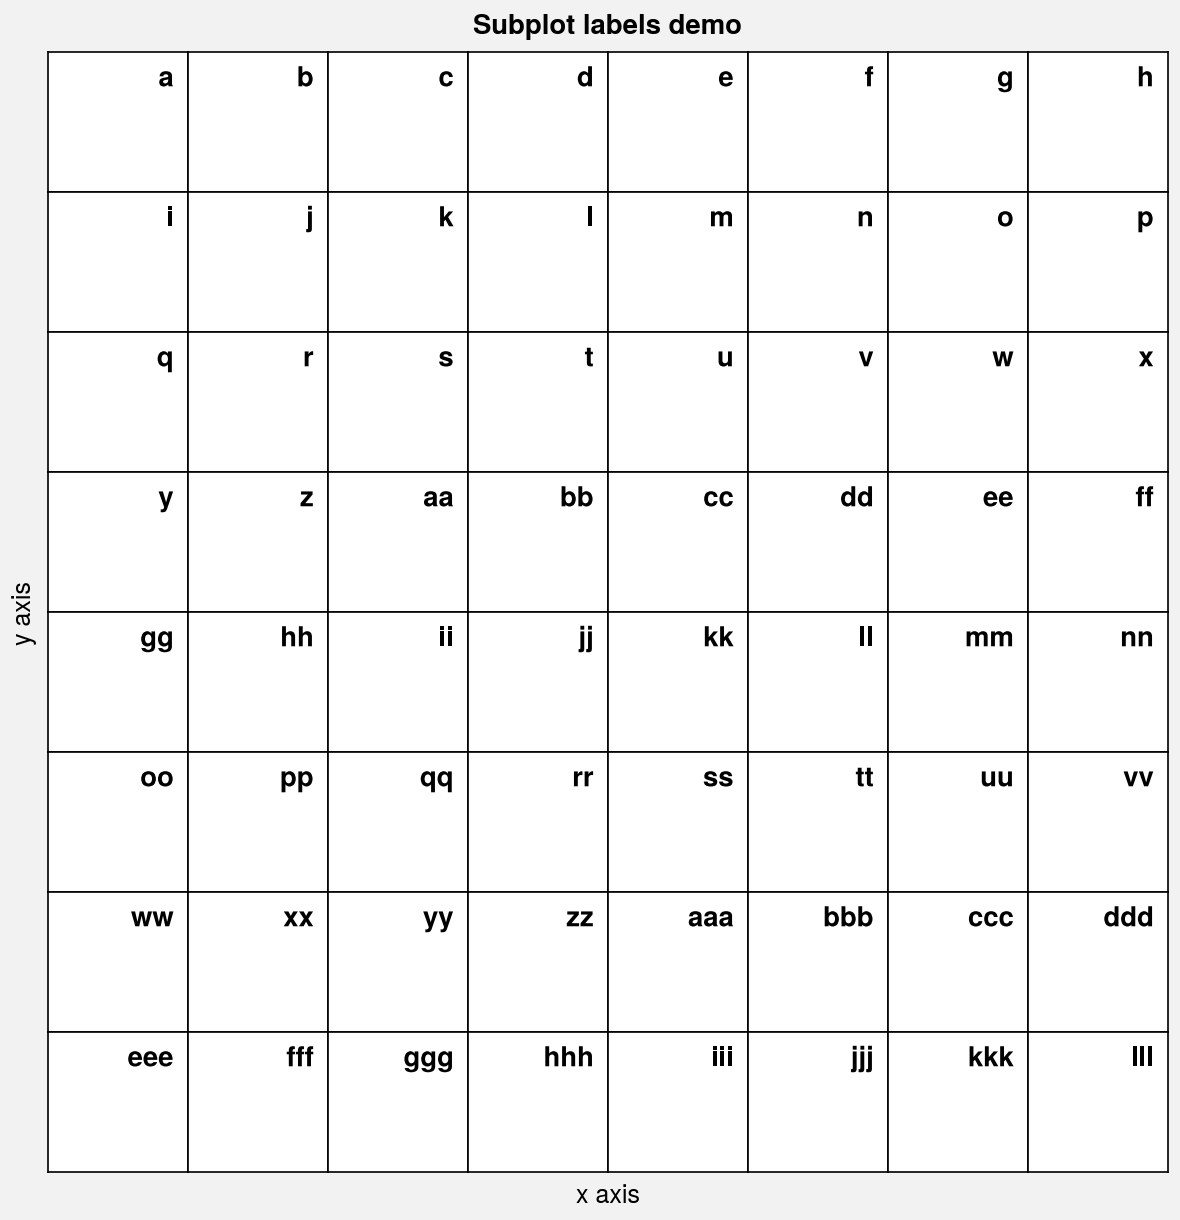

In [2]:
import proplot as pplt
fig, axs = pplt.subplots(nrows=8, ncols=8, refwidth=0.7, space=0)
axs.format(
    abc=True, abcloc='ur',
    xlabel='x axis', ylabel='y axis', xticks=[], yticks=[],
    suptitle='Subplot labels demo'
)

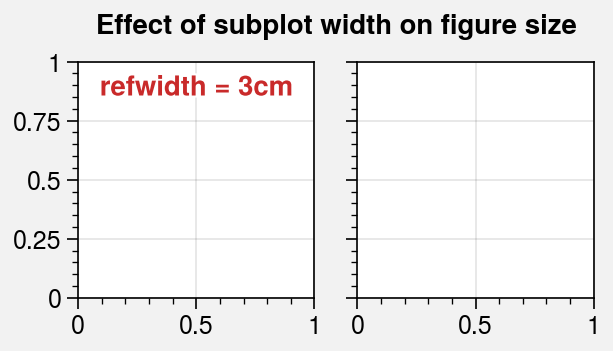

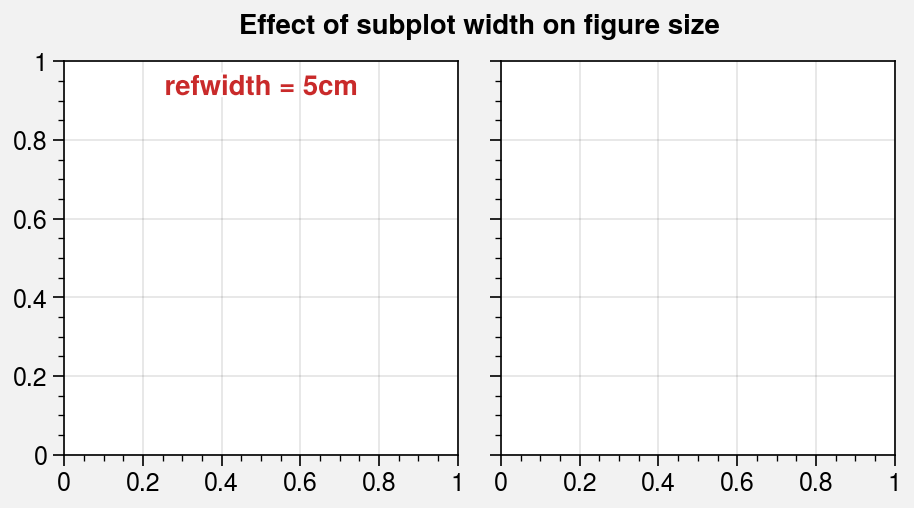

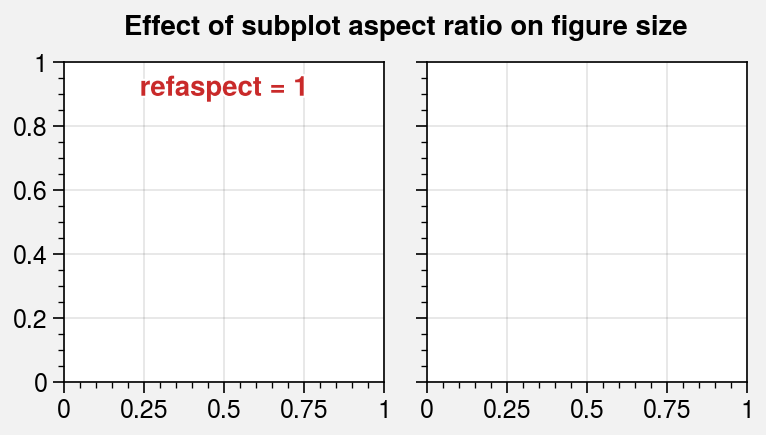

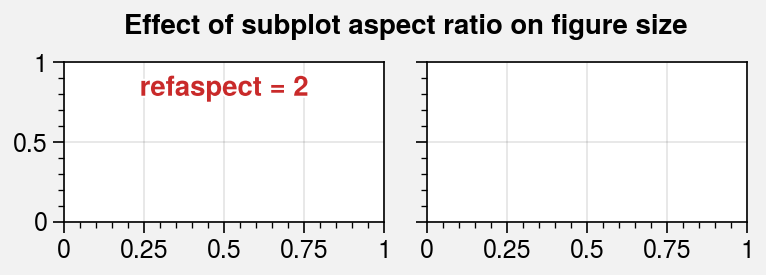

In [3]:
import proplot as pplt

# Change the reference subplot width
suptitle = 'Effect of subplot width on figure size'
for refwidth in ('3cm', '5cm'):
    fig, axs = pplt.subplots(ncols=2, refwidth=refwidth,)
    axs[0].format(
        suptitle=suptitle,
        title=f'refwidth = {refwidth}', titleweight='bold',
        titleloc='uc', titlecolor='red9',
    )

# Change the reference subplot aspect ratio
for refaspect in (1, 2):
    fig, axs = pplt.subplots(ncols=2, refwidth=1.6, refaspect=refaspect)
    axs[0].format(
        suptitle='Effect of subplot aspect ratio on figure size',
        title=f'refaspect = {refaspect}', titleweight='bold',
        titleloc='uc', titlecolor='red9',
    )

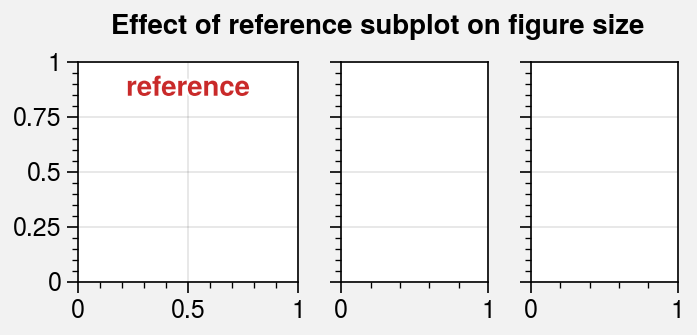

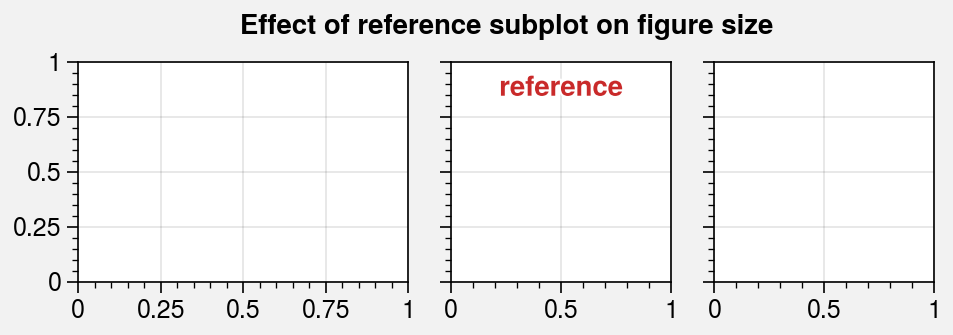

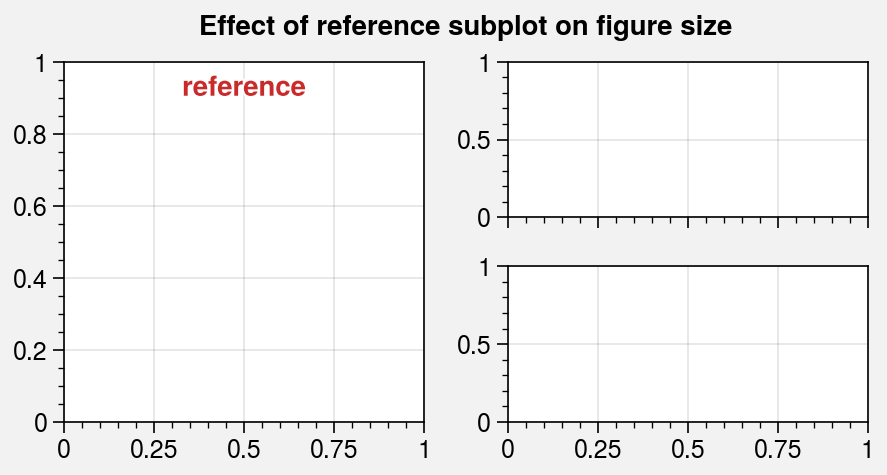

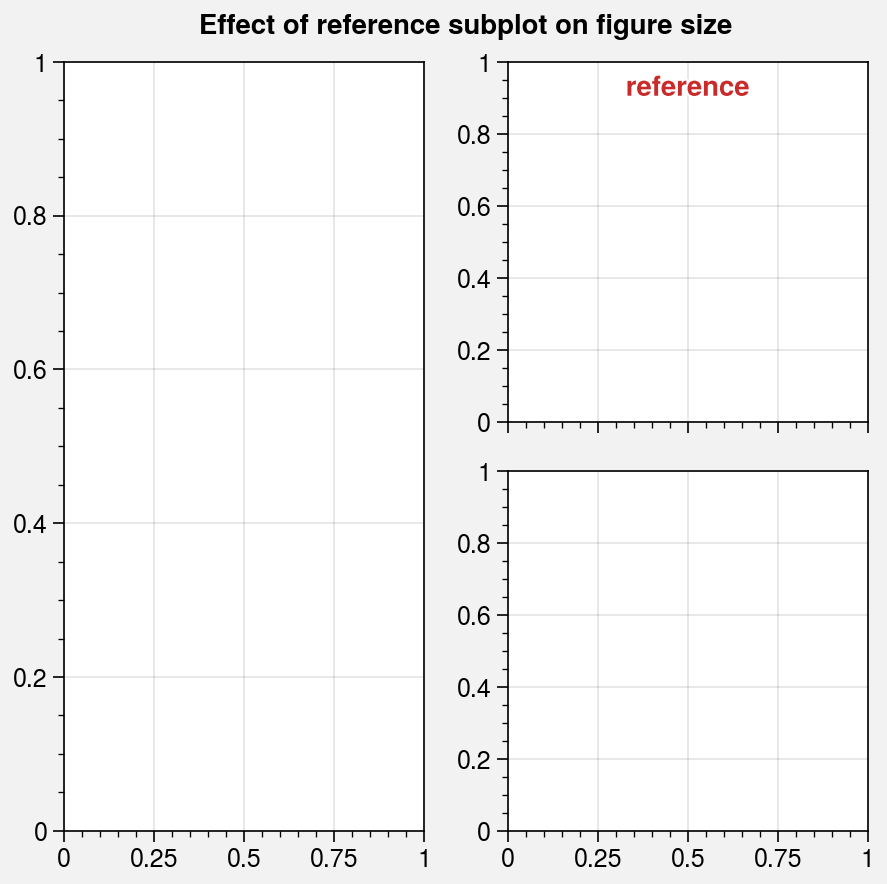

In [4]:
import proplot as pplt

# Change the reference subplot in presence of unequal width/height ratios
for ref in (1, 2):
    fig, axs = pplt.subplots(
        ncols=3, wratios=(3, 2, 2), ref=ref, refwidth=1.1,
    )
    axs[ref - 1].format(
        suptitle='Effect of reference subplot on figure size',
        title='reference', titleweight='bold',
        titleloc='uc', titlecolor='red9'
    )

# Change the reference subplot in a complex grid
for ref in (1, 2):
    fig, axs = pplt.subplots(
        [[1, 2], [1, 3]],
        ref=ref, refwidth=1.8, span=False
    )
    axs[ref - 1].format(
        suptitle='Effect of reference subplot on figure size',
        title='reference', titleweight='bold',
        titleloc='uc', titlecolor='red9'
    )

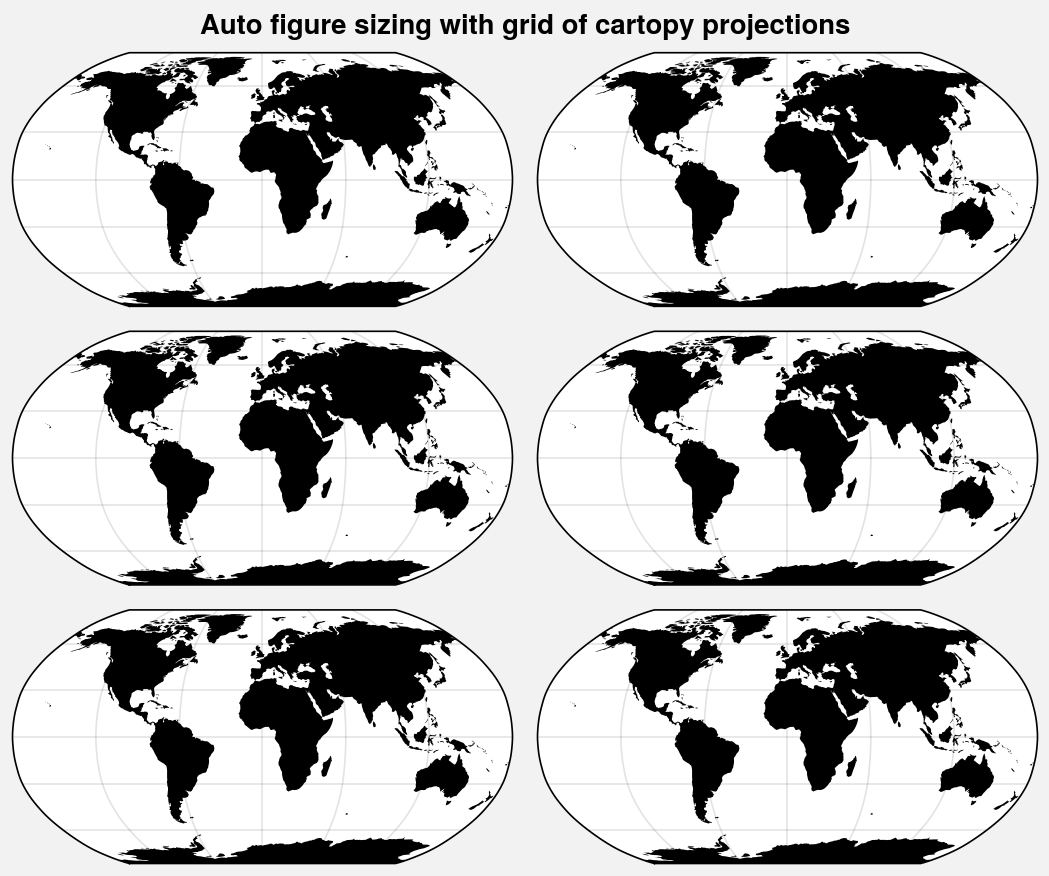

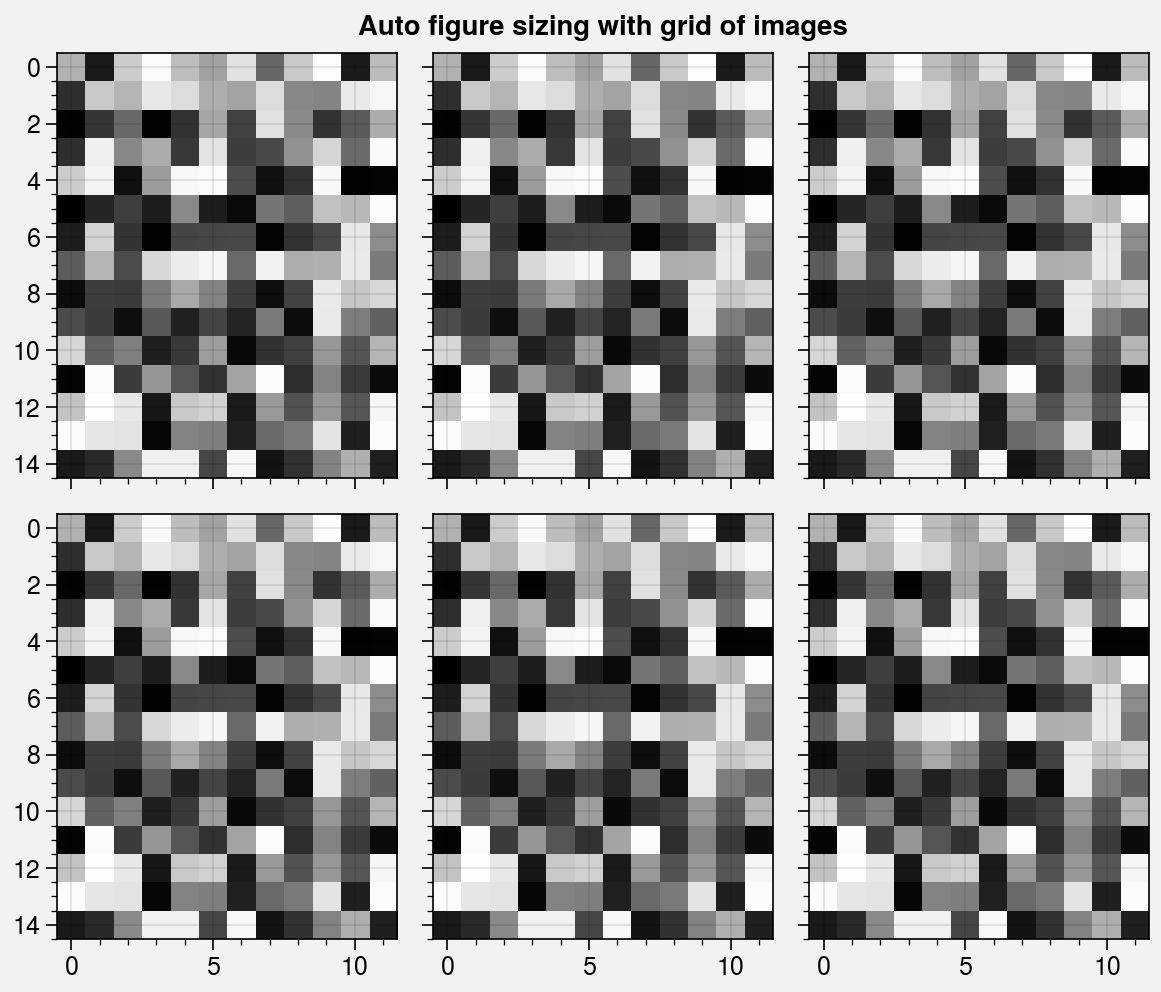

In [5]:
import proplot as pplt
import numpy as np

# Auto sized grid of cartopy projections
fig, axs = pplt.subplots(ncols=2, nrows=3, proj='robin')
axs.format(
    land=True, landcolor='k',
    suptitle='Auto figure sizing with grid of cartopy projections'
)

# Auto sized grid of images (note the square pixels)
state = np.random.RandomState(51423)
colors = np.tile(state.rand(15, 12, 1), (1, 1, 3))
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth=1.7)
axs.imshow(colors)
axs.format(
    suptitle='Auto figure sizing with grid of images'
)

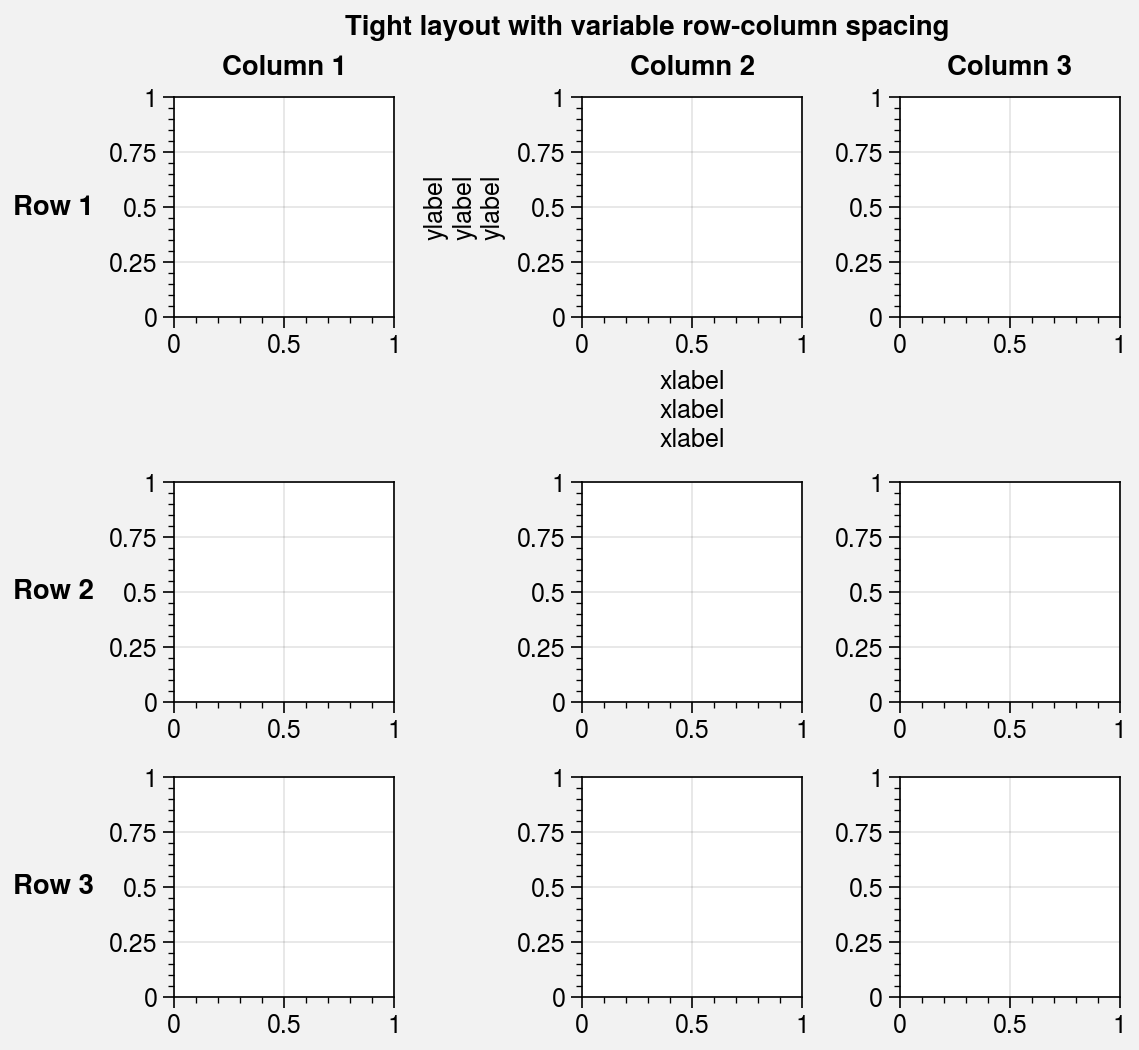

In [6]:
import proplot as pplt

# Automatic spacing for all margins and between all columns and rows
fig, axs = pplt.subplots(nrows=3, ncols=3, refwidth=1.1, share=0)

# Formatting that stress-tests the algorithm
axs[1].format(xlabel='xlabel\nxlabel\nxlabel', ylabel='ylabel\nylabel\nylabel')
axs.format(
    toplabels=('Column 1', 'Column 2', 'Column 3'),
    leftlabels=('Row 1', 'Row 2', 'Row 3'),
    suptitle='Tight layout with variable row-column spacing'
)

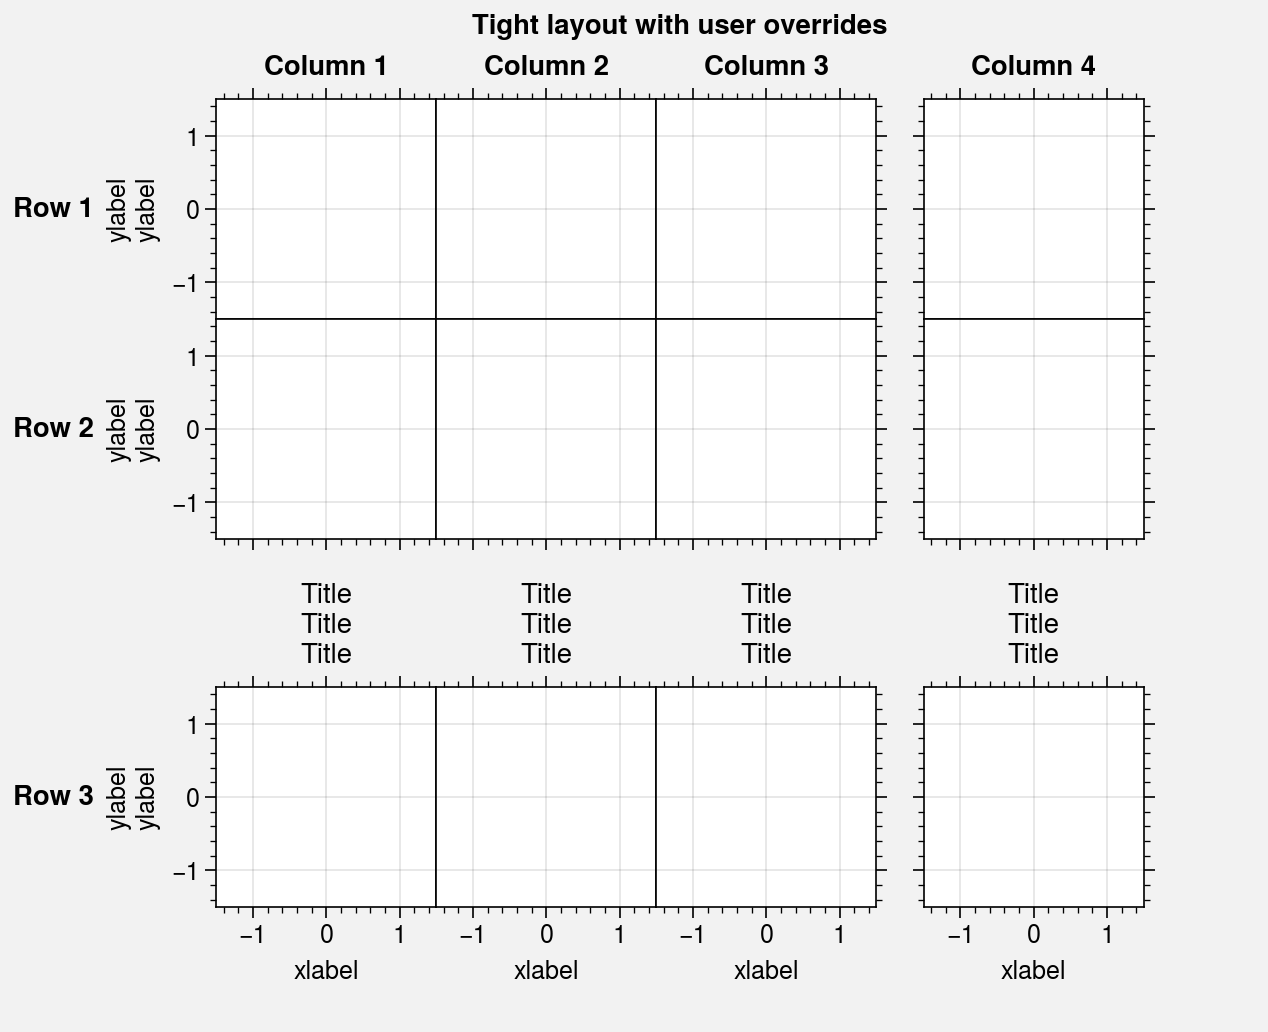

In [7]:
import proplot as pplt

# Manual spacing for certain margins and between certain columns and rows
fig, axs = pplt.subplots(
    ncols=4, nrows=3, refwidth=1.1, span=False,
    bottom='5em', right='5em',  # margin spacing overrides
    wspace=(0, 0, None), hspace=(0, None),  # column and row spacing overrides
)

# Formatting that stress-tests the algorithm
axs.format(
    xlim=(-1.5, 1.5), ylim=(-1.5, 1.5), xlocator=1, ylocator=1,
    suptitle='Tight layout with user overrides',
    toplabels=('Column 1', 'Column 2', 'Column 3', 'Column 4'),
    leftlabels=('Row 1', 'Row 2', 'Row 3'),
)
axs[0, :].format(xtickloc='top')
axs[2, :].format(xtickloc='both')
axs[:, 1].format(ytickloc='neither')
axs[:, 2].format(ytickloc='right')
axs[:, 3].format(ytickloc='both')
axs[-1, :].format(title='Title\nTitle\nTitle', xlabel='xlabel')
axs[:, 0].format(ylabel='ylabel\nylabel')

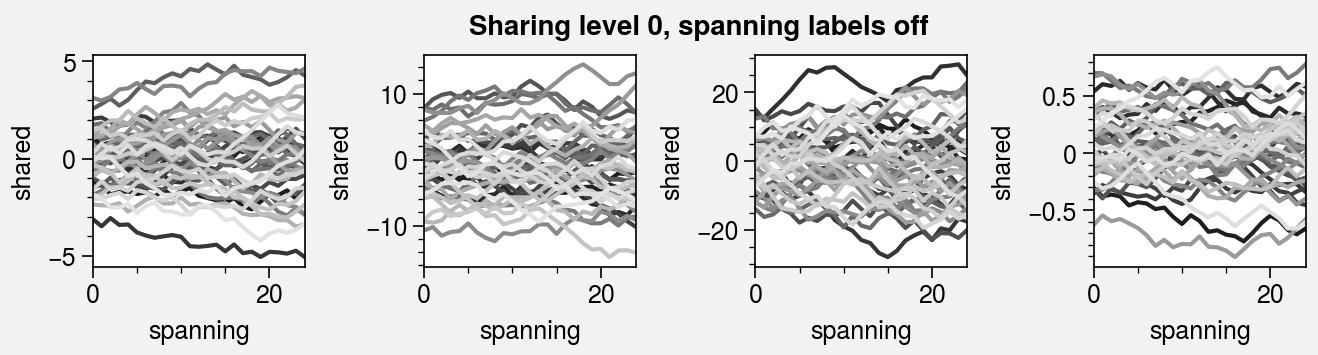

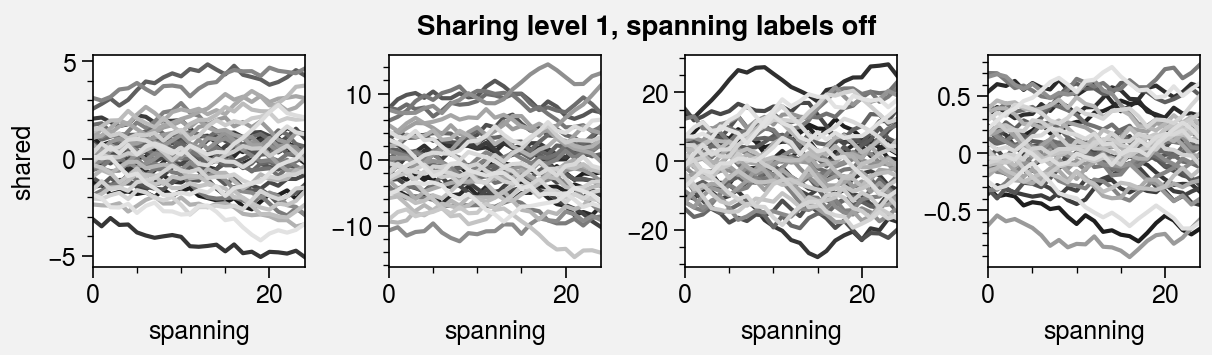

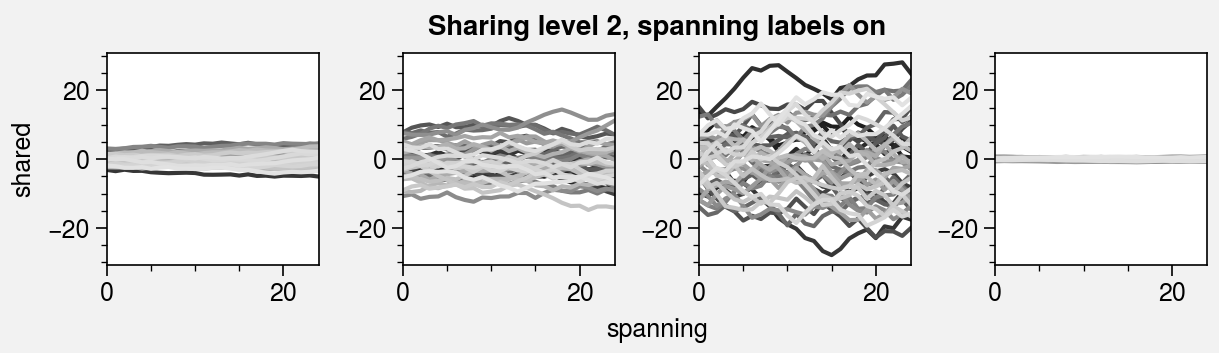

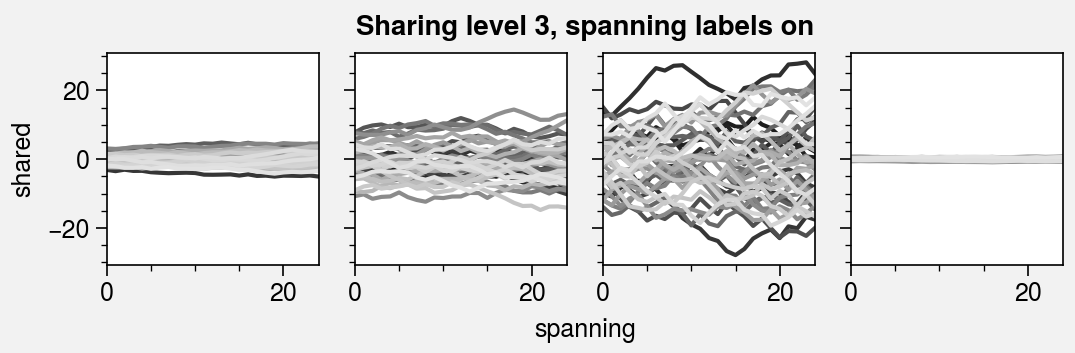

In [8]:
import proplot as pplt
import numpy as np
N = 50
M = 40
state = np.random.RandomState(51423)
colors = pplt.Colors('grays_r', M, left=0.1, right=0.8)
datas = []
for scale in (1, 3, 7, 0.2):
    data = scale * (state.rand(N, M) - 0.5).cumsum(axis=0)[N // 2:, :]
    datas.append(data)

# Same plot with different sharing and spanning settings
for share in (0, 1, 2, 3):
    fig, axs = pplt.subplots(
        ncols=4, refaspect=1, refwidth=1.06,
        sharey=share, spanx=share // 2
    )
    for ax, data in zip(axs, datas):
        on = ['off', 'on'][share // 2]
        ax.plot(data, cycle=colors)
        ax.format(
            suptitle=f'Sharing level {share}, spanning labels {on}',
            grid=False, xlabel='spanning', ylabel='shared'
        )

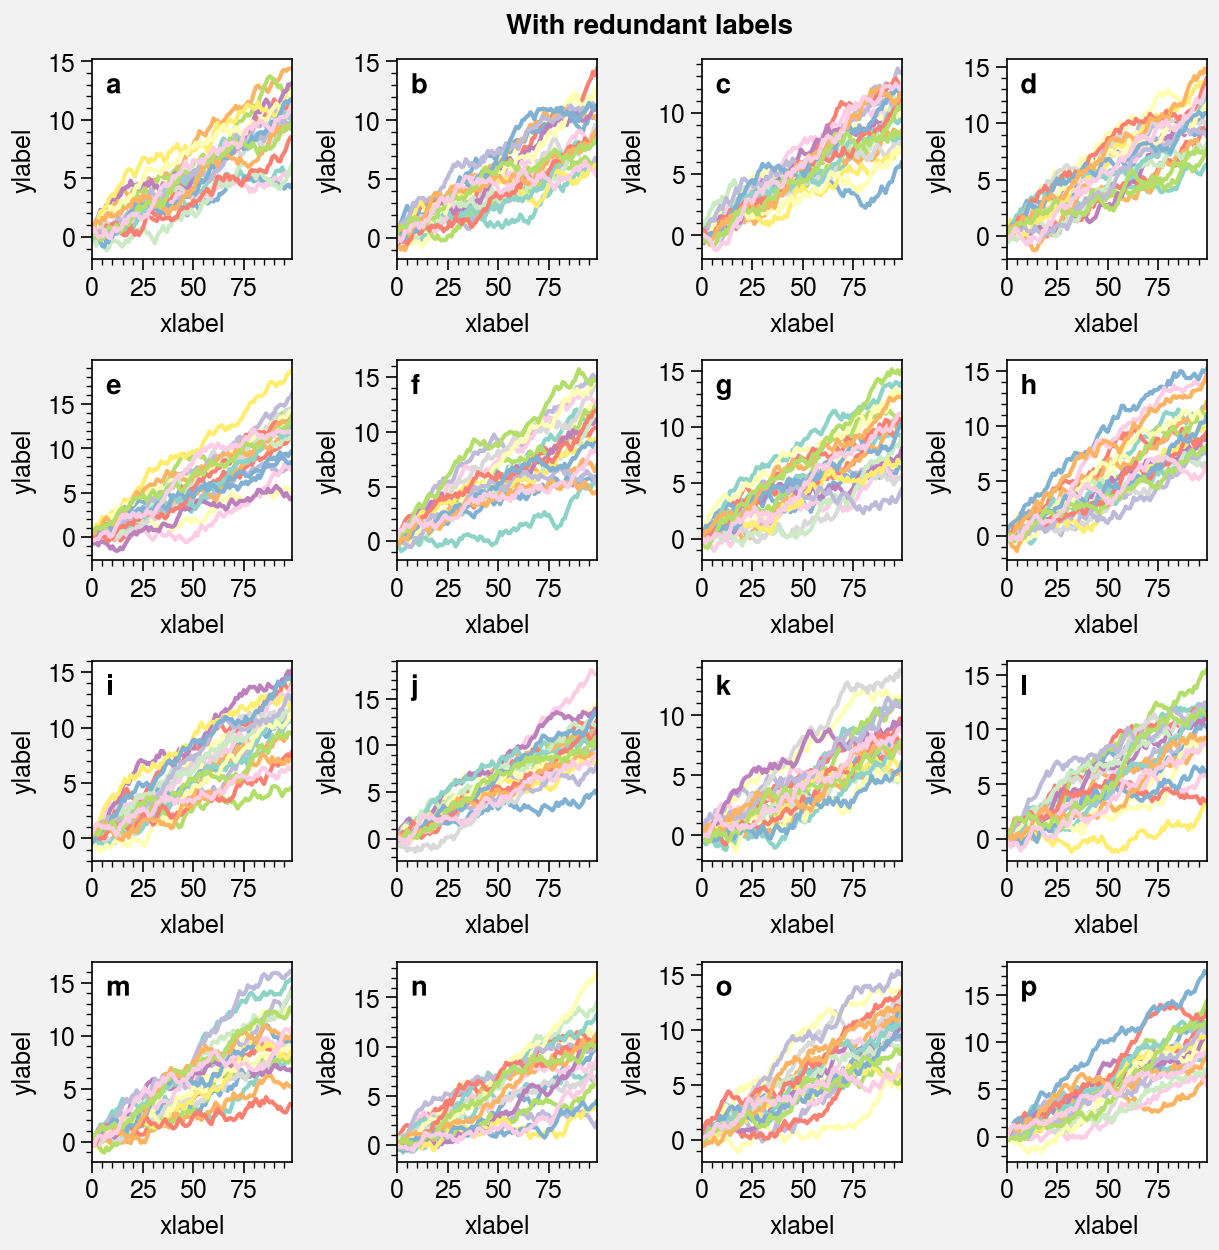

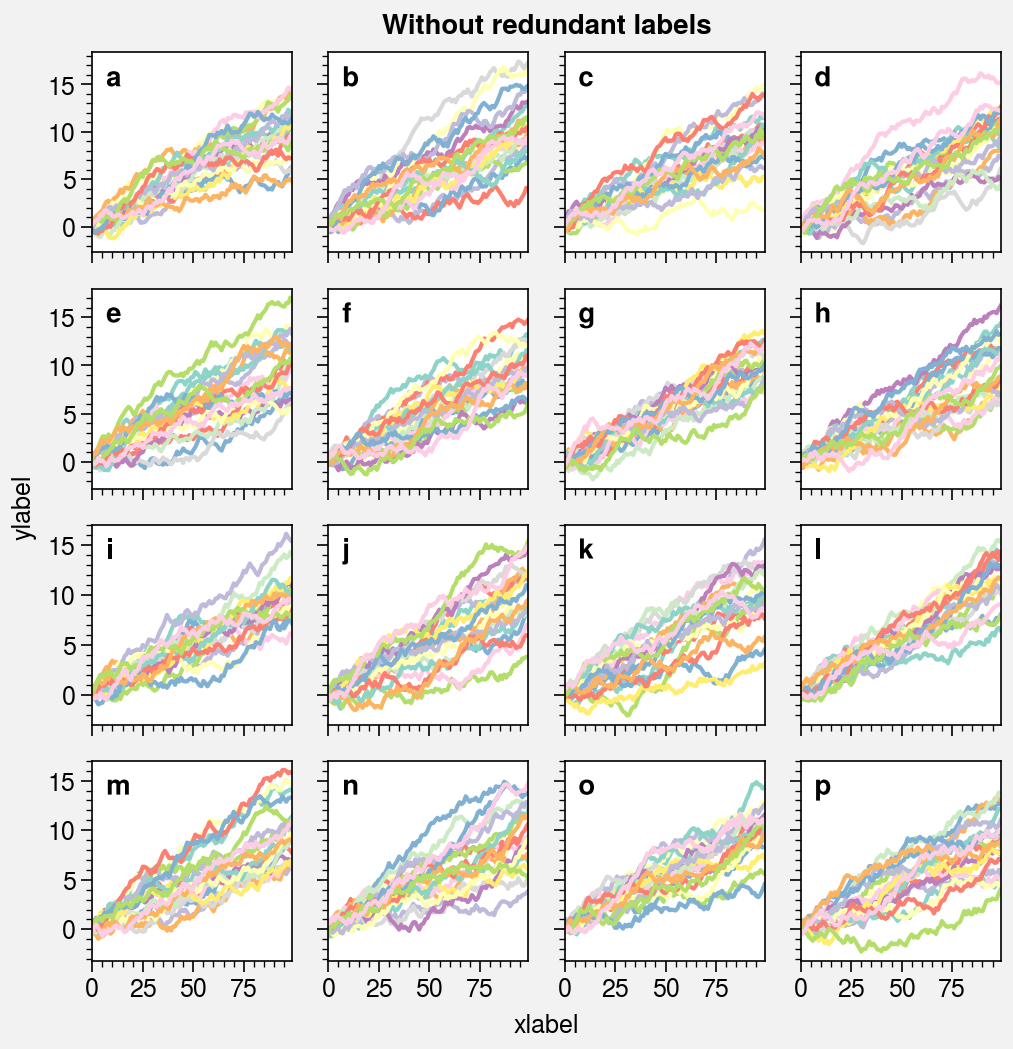

In [9]:
import proplot as pplt
import numpy as np
pplt.rc.reset()
pplt.rc.cycle = 'Set3'
state = np.random.RandomState(51423)
titles = ['With redundant labels', 'Without redundant labels']

# Same plot with and without default sharing settings
for mode in (0, 1):
    fig, axs = pplt.subplots(
        nrows=4, ncols=4, share=3 * mode,
        span=1 * mode, refwidth=1
    )
    for ax in axs:
        ax.plot((state.rand(100, 20) - 0.4).cumsum(axis=0))
    axs.format(
        xlabel='xlabel', ylabel='ylabel', suptitle=titles[mode],
        abc=True, abcloc='ul',
        grid=False, xticks=25, yticks=5
    )

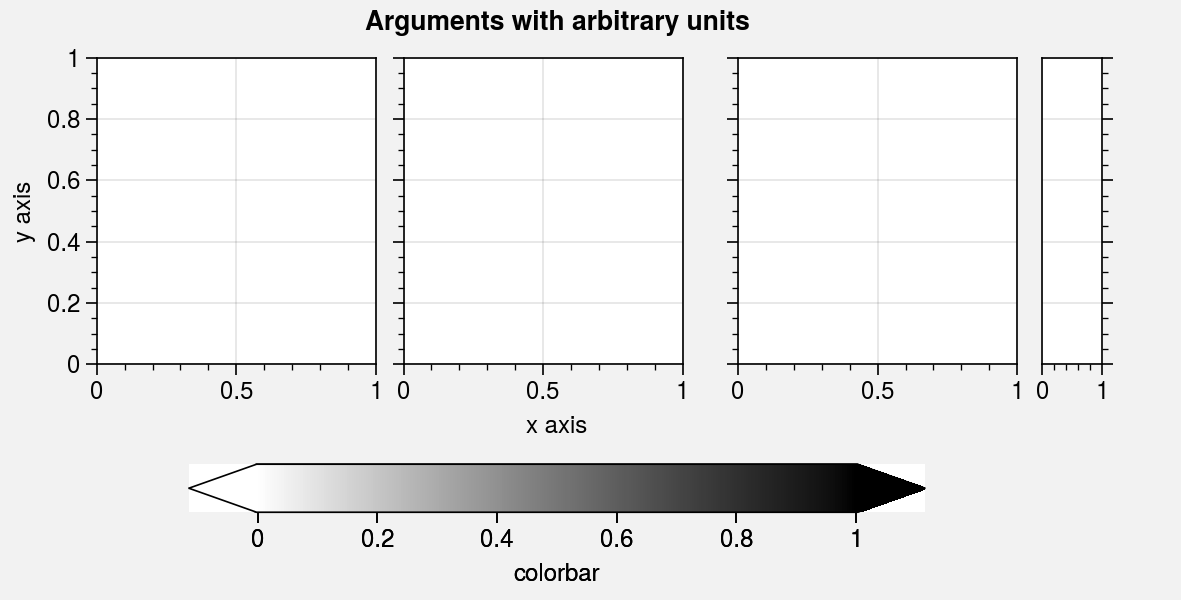

In [10]:
import proplot as pplt
import numpy as np
with pplt.rc.context(fontsize='12px'):
    fig, axs = pplt.subplots(
        ncols=3, figwidth='15cm', figheight='3in',
        wspace=('10pt', '20pt'), right='10mm'
    )
    cmap = pplt.Colormap('Mono')
    cb = fig.colorbar(
        cmap, loc='b', extend='both', label='colorbar',
        width='2em', extendsize='3em', shrink=0.8,
    )
    pax = axs[2].panel('r', width='5en')
    pax.format(xlim=(0, 1))
axs.format(
    suptitle='Arguments with arbitrary units',
    xlabel='x axis', ylabel='y axis',
    xlim=(0, 1), ylim=(0, 1),
)